## Improving Search, Local, and global optIma

For a model with decision vector $\vec{x}$, the first solution visited by
a search is denoted $\vec{x}^{(0)}$, the next $\vec{x}^{(1)}$, and so on.

### Example: DClub LocatIon

In [1]:
import numpy as np
# location of center 1 and population
c1x = np.array([-1,3])
c1pop = 60000
# location of center 2
c2x = np.array([1,3])
c2pop = 20000
# location of center 3
c3x = np.array([0,-4])
c3pop = 30000
# The new store can be located anywhere except in the congested areas within
# 1/2 mile of each population center.
distance = lambda x, xc : np.sqrt(np.sum((x - xc)**2))

Lets draw the populations on a graph and the 1/2 mile radius

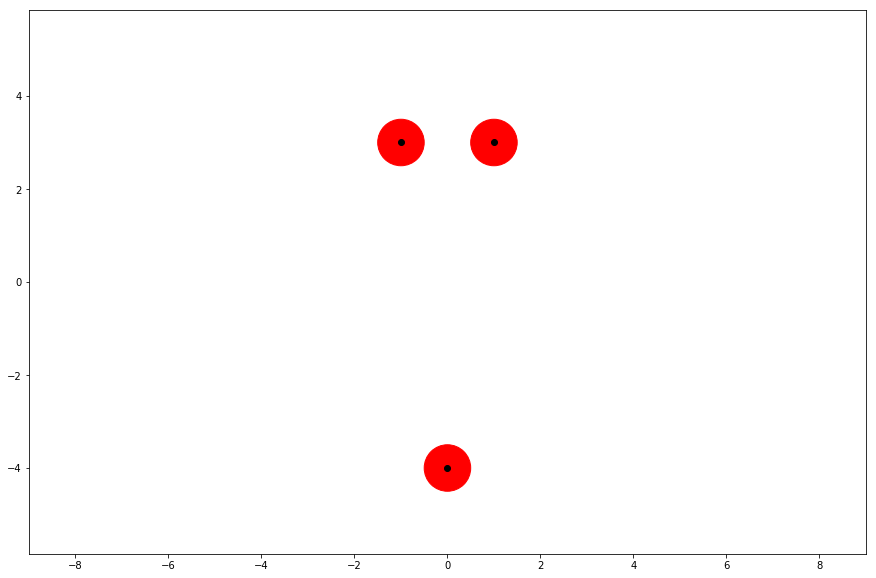

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.set_xlim((-9, 9))
ax.set_ylim((-9, 9))
# key data point that we are encircling
ax.plot(c1x[0], c1x[1], 'o', color = 'k')
ax.plot(c2x[0], c2x[1], 'o', color = 'k')
ax.plot(c3x[0], c3x[1], 'o', color = 'k')
circle1 = plt.Circle(c1x,1/2,color = 'r')
plt.gcf().gca().add_artist(circle1)
circle2 = plt.Circle(c2x,1/2,color = 'r')
plt.gcf().gca().add_artist(circle2)
circle3 = plt.Circle(c3x,1/2,color = 'r')
plt.gcf().gca().add_artist(circle3)
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   # Causes an autoscale update.
plt.show()

For an objective function, assume that experience shows that the business attracted from any population follows a “gravity” pattern—proportional to population (here in thousands) and inversely proportional to 1 + the square of its distance from the chosen location.

In [6]:
objective = lambda x1,x2 : 60/(1+(x1+1)**2+(x2-3)**2)+20/(1+(x1-1)**2+(x2-3)**2)+30/(1+(x1)**2+(x2+4)**2)

Lets draw the landscape for this objective function, and the improving search example given in the text:

[-3.  4.]
[-1.   4.5]
[0.  3.5]
[-0.5  3. ]


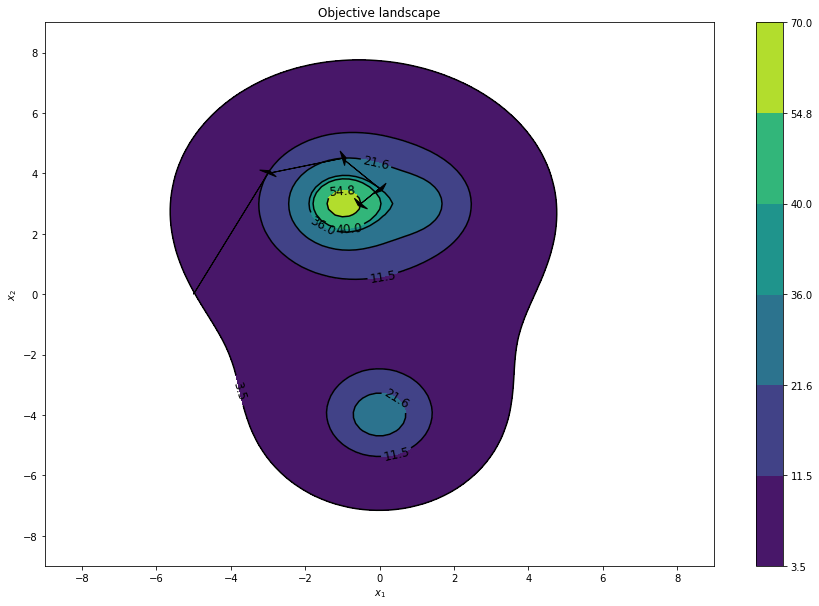

In [7]:
x1list = np.linspace(-9.0, 9.0, 100)
x2list = np.linspace(-9.0, 9.0, 100)
X1, X2 = np.meshgrid(x1list, x2list)
F = objective(X1,X2)
levels = [3.5, 11.5, 21.6, 36, 40, 54.8, 70]
contour = plt.contour(X1, X2, F, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X1, X2, F, levels)
plt.colorbar(contour_filled)
plt.title('Objective landscape')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
x = np.array([-5,0]) # we start our initial guess here
# example steps that could be taken (don't worry about how for now)
step = np.array([[ 2. ,  4. ],[ 2. ,  0.5], [ 1. , -1. ], [-0.5, -0.5]])
for iter in range(4):
    plt.arrow( x[0], x[1], step[iter,0], step[iter,1], fc="k", ec="k", head_width=0.5, head_length=0.1 )
    x = x + step[iter,:]
    print(x)
plt.show()

The __neighborhood__ of a current solution $\vec{x}^{(t)}$ consists of all
nearby points; that is, all points within a small positive distance of $\vec{x}^{(t)}$.

The __gradient__ describes the shape of the objective function because each partial derivative of the objective function at any current solution quantifies the slope or rate of change per unit change in one of the coordinate directions.

When objective function gradient $\nabla f(\vec{x}) \ne  0$,$\nabla\vec{x} = \nabla f(\vec{x})$ is an improving direction for a maximize objective $f$, $\nabla\vec{x} = -\nabla f(\vec{x})$ is an improving direction for minimizing $f$.

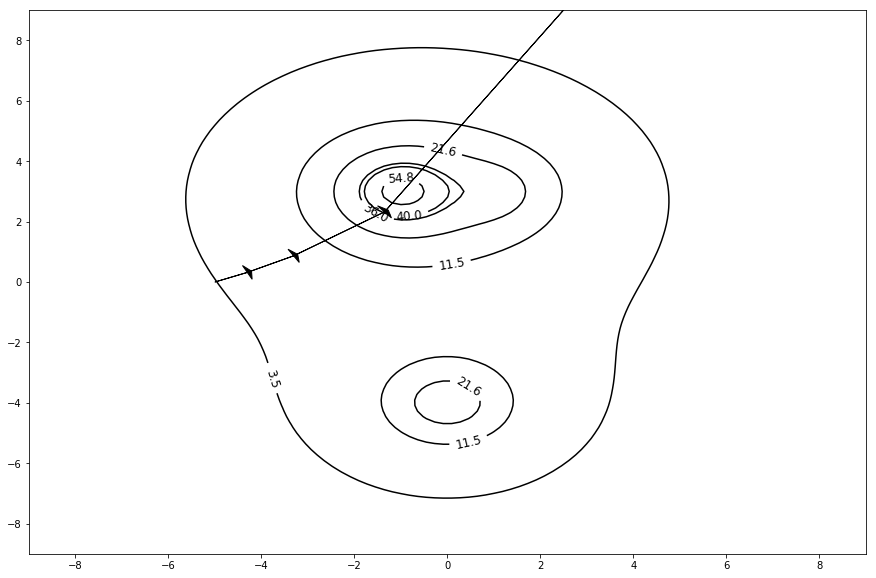

In [23]:
contour = plt.contour(X1, X2, F, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
import sympy as sp
#sp.init_printing()
x1, x2 = sp.symbols('x1 x2')
f = objective(x1,x2)
dfdx1=sp.diff(f,x1)
dfdx2=sp.diff(f,x2)
x = np.array([-5,0])
lmda = .7
for iter in range(4):
    dx1 = np.float(dfdx1.subs(x1,x[0]).subs(x2,x[1]).evalf())
    dx2 = np.float(dfdx2.subs(x1,x[0]).subs(x2,x[1]).evalf())
    plt.arrow( x[0], x[1], lmda*dx1, lmda*dx2, fc="k", ec="k", head_width=0.5, head_length=0.1 )
    x = x + lmda*np.array([dx1,dx2])   

### Local optima
A solution is a local optimum (local maximum for a maximize problem or local minimum for a minimize problem) if it is feasible and if sufficiently small neighborhoods surrounding it contain no points that are both
feasible and superior in objective value.

### Global optimum
A solution is a global optimum (global maximum for a maximize problem or global minimum for a minimize problem) if it is feasible and no other feasible solution has superior objective value (global optima are always also local optima).

## Feasible Directions
A vector $\Delta \vec{x}$ is a __feasible direction__ at current solution $\vec{x}^{(t)}$ if point $\vec{x}^{(t)}+\lambda\Delta\vec{x}$ violates no model constraint if $\lambda>0$ is suffiently small.